In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [8]:
#read in moco data provided
raw_data = pd.read_csv('data/tabular_data/moco_adu.csv')

#read in rent data that was pulled from census bureau
rent = pd.read_csv('data/data_rent.csv')

In [9]:
####Gather relocation columns for a smaller data
pl_people = raw_data[[
'GEOID','RELOC_COUNTY_18_19',
'RELOC_COUNTY_20_24',
'RELOC_COUNTY_25_29',
'RELOC_COUNTY_30_34', 
'RELOC_COUNTY_65_69',
'RELOC_COUNTY_70_74',
'RELOC_COUNTY_75_OVER',
'MED_HH_INCOME',
'RELOC_COUNTY_35_39',
'RELOC_COUNTY_40_44',
'RELOC_COUNTY_45_49',
'RELOC_COUNTY_50_54',
'RELOC_COUNTY_55_59',
'RELOC_COUNTY_60_64'

]]



#create column that matches MOCO GEOID FIPS Code in the Rent data
rent['GEOID'] = rent['state'].astype(str) + '0'+ rent['county'].astype(str) +rent['tract'].astype(str)

#change GEOID into a string type for merging later on
pl_people['GEOID']= pl_people['GEOID'].astype(str)


C:\Users\593268\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
#merge MOCO data with rent data
df_merge = pl_people.merge(rent, how= 'inner',on= 'GEOID')

#replace likely input error in rent data with median of column for median rent
df_merge.replace(-666666666, df_merge['Median Gross Rent (Dollars): Median gross rent'].median(), inplace = True)


#create columns for different age groups that have relocated within the county 

#ages 18-34
df_merge['young_movers']= df_merge['RELOC_COUNTY_18_19'] +df_merge['RELOC_COUNTY_20_24']+df_merge['RELOC_COUNTY_25_29']+df_merge['RELOC_COUNTY_30_34']
#ages 65+
df_merge['elder_movers']= df_merge['RELOC_COUNTY_65_69'] +df_merge['RELOC_COUNTY_70_74']+df_merge['RELOC_COUNTY_75_OVER']
#ages 35-64
df_merge['middle_movers']= df_merge['RELOC_COUNTY_35_39'] +df_merge['RELOC_COUNTY_40_44']+df_merge['RELOC_COUNTY_45_49']+df_merge['RELOC_COUNTY_50_54']+df_merge['RELOC_COUNTY_60_64']+df_merge['RELOC_COUNTY_55_59']



An assumption of our team was that younger of age people will be more likely to move.  
~36% of total population that moved was in this younger age group of 18-34 which is the largest group.  
As seen below in areas with lower income, young movers are more likely to move. There is a very high negative correlation between these groups. The other groups are not as affected by median household income.




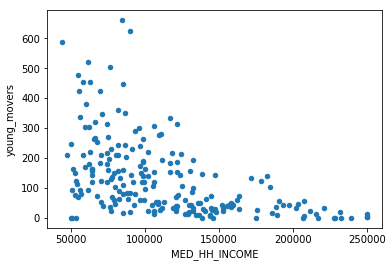

In [11]:
#show a scatter plot for the median household income and the younger movers
#assumption:young people are more likely to move and relocate
df_merge.plot.scatter(x='MED_HH_INCOME', y='young_movers')


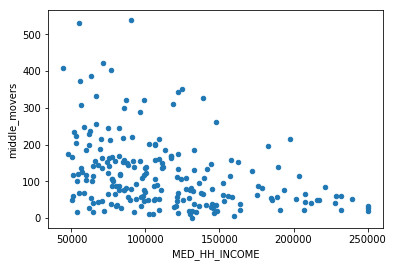

In [101]:
#show a scatter plot for the median household income and the middle aged movers

df_merge.plot.scatter(x='MED_HH_INCOME', y='middle_movers')

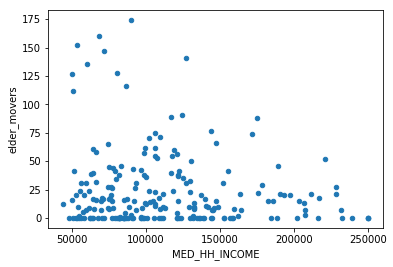

In [102]:
#show a scatter plot for the median household income and the elder movers

df_merge.plot.scatter(x='MED_HH_INCOME', y='elder_movers')